<a href="https://colab.research.google.com/github/kimkukhwa/FBProphet_Test/blob/main/FBProphet_carsale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import pandas as pd
from matplotlib import pyplot
from fbprophet import Prophet
from pandas import to_datetime
from sklearn.metrics import mean_absolute_error
from fbprophet.plot import plot_plotly, plot_components_plotly


## Importing Data from Github

In [19]:

url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(url, header=0)
print(df.tail(10))
print (df.shape)


       Month  Sales
98   1968-03  20139
99   1968-04  21725
100  1968-05  26099
101  1968-06  21084
102  1968-07  18024
103  1968-08  16722
104  1968-09  14385
105  1968-10  21342
106  1968-11  17180
107  1968-12  14577
(108, 2)


### Check trend: Clearly there is a monthly seasonal pattern to the sales. Will take this into account.

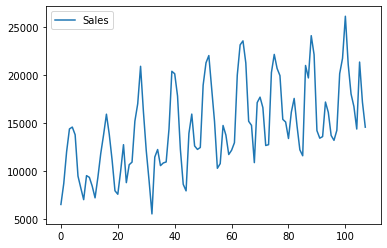

In [20]:
df.plot()

### Create train dataset, removing last 12 months

In [21]:
df.columns=['ds','y']
df['ds']=to_datetime(df['ds'])
train = df.drop(df.index[-12:])
print(train.tail())


           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


## Instantiating a Fbprophet model & Fitting the historical data

In [22]:
m = Prophet(
    interval_width=0.95,
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode='multiplicative'
)
m.fit(train)

## Setting prediction days

In [23]:
from pandas.core.frame import DataFrame
future=list()
for i in range (1, 13):
  date='1968-%02d' % i
  future.append([date])
future=DataFrame(future)
future.columns=['ds']
future['ds']=to_datetime(future['ds'])


## Predicted value & confidence intervals 

In [24]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
7,1968-08-01,13887.432160,8788.664936,19884.294330
8,1968-09-01,11054.011173,6044.122936,16588.704274
9,1968-10-01,17393.835758,8599.999676,26774.135913
10,1968-11-01,17121.408594,7546.504578,28228.420424
11,1968-12-01,13847.935116,4873.081067,24001.555309


## MAE between expected and predicted values for Dec

In [25]:
y_true=df['y'][-12:].values
y_pred=forecast['yhat'].values
mae=mean_absolute_error(y_true,y_pred)
print('MAE: %.3f' %mae)

MAE: 1498.121


## Predicted vs Actual

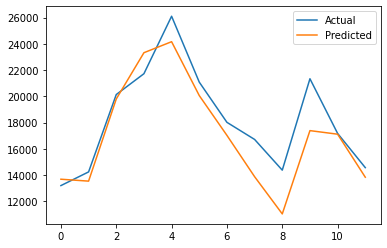

In [26]:
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

## Prophet.plot method to plot the forecast

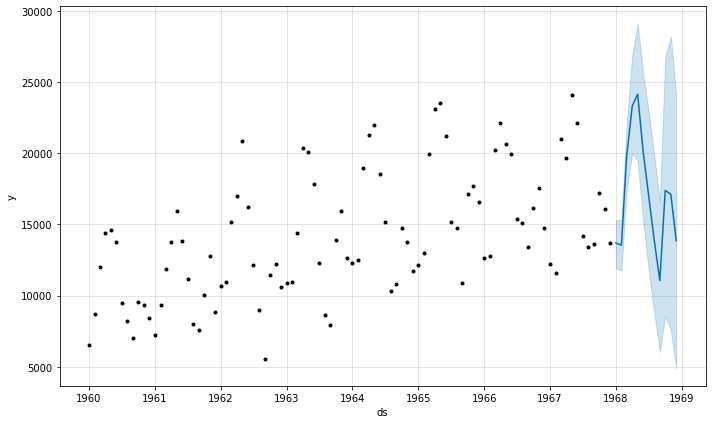

In [27]:
fig1 = m.plot(forecast)


## Trend, yearly seasonality, and weekly seasonality of the time series

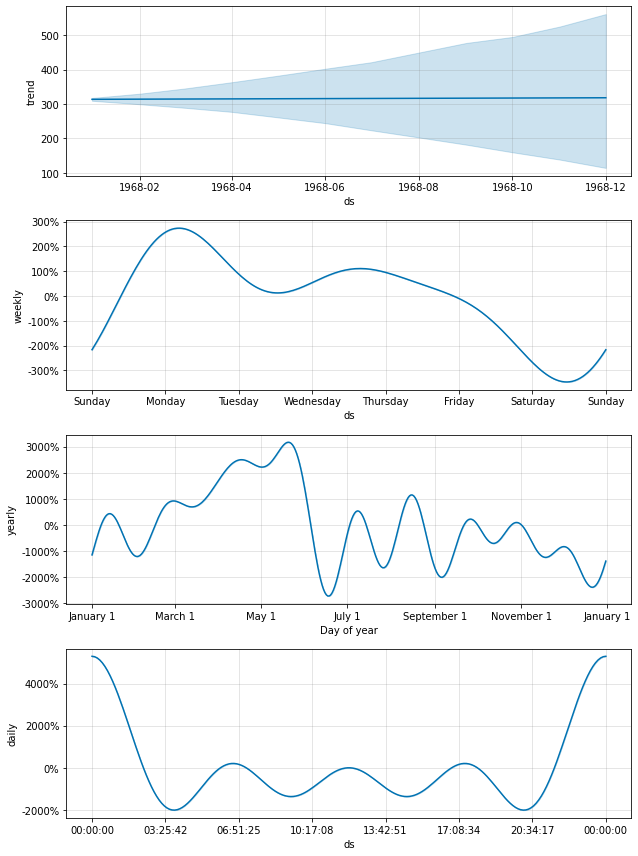

In [28]:
fig2 = m.plot_components(forecast)


## Interactive figures with plotly

In [29]:
plot_plotly(m, forecast)

In [30]:
plot_components_plotly(m, forecast)
